In [109]:
from scipy.misc import imread
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mahotas as mh
import numpy as np
import pandas as pd
import re
from PIL import Image
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline  

In [2]:
# load training.csv file with case id and fga numbers
train_df = pd.read_csv('csv/training.csv',header=None)
train_df.head()

,0,1
0,10500,0.19
1,10549,0.58
2,11169,0.05
3,13188,0.09
4,13699,0.04


In [3]:
# load test.csv file with case id
test_df = pd.read_csv('csv/test.csv',header=None)
test_df.head()

,0
0,11229
1,11996
2,12059
3,12796
4,13553


In [4]:
# save all path to image files
import glob
TS_path = glob.glob('C:\\Users\\Shonket\\Google Drive\\Contest Images\\TS\\*.png')
DX_path = glob.glob('C:\\Users\\Shonket\\Google Drive\\Contest Images\\DX\\*.png')

In [10]:
# form TS feature matrix
df_TS = []
start_time = time.time()
counter = 0
# loop through each folder to form feature matrix
for im_filename in TS_path:
    # load and display black and white image
    im = Image.open(im_filename).convert("L")
    arr = np.asarray(im)
    #print arr.shape
    #print type(arr)
    #plt.imshow(arr, cmap = cm.Greys_r)
    #plt.show()
    # find haralick features
    f = mh.features.haralick(arr,return_mean=True)
    tas_val = mh.features.tas(arr)
    #print f
    #print tas_val
    TS_case_id = re.split(r"\\|\.|\-",im_filename)[6]
    #print train_case_id
    data_row = f.tolist()
    data_row2 = tas_val.tolist()
    full_data_row = data_row + data_row2
    full_data_row.insert(0, TS_case_id)
    #print full_data_row
    df_TS.append(data_row) 
    counter += 1
    print counter,
    
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27

KeyboardInterrupt: 

In [7]:
# make into dataframe and write to csv
TS_df = pd.DataFrame(df_TS)
TS_df.columns = ['CaseID','f1_TS','f2_TS','f3_TS','f4_TS','f5_TS','f6_TS','f7_TS','f8_TS',
                      'f9_TS','f10_TS','f11_TS','f12_TS','f13_TS',]
#df_train_TS.columns.values
#df_train_TS = df_train_TS.set_index(['CaseID'])
TS_df.head()
TS_df.to_csv('TS_val.csv')

In [8]:
# form DX feature matrix
df_DX = []
start_time = time.time()
# loop through each folder to form feature matrix
for im_filename in DX_path:
    # load and display black and white image
    im = Image.open(im_filename).convert("L")
    arr = np.asarray(im)
    #print arr.shape
    #print type(arr)
    #plt.imshow(arr, cmap = cm.Greys_r)
    #plt.show()
    # find haralick features
    f = mh.features.haralick(arr,return_mean=True)
    #print f
    DX_case_id = re.split(r"\\|\.|\-",im_filename)[6]
    #print train_case_id
    data_row = f.tolist()
    data_row.insert(0, DX_case_id)
    #print data_row
    df_DX.append(data_row) 
    #ind += 1
    
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 2632.19 seconds


In [9]:
# make into dataframe and write to csv
DX_df = pd.DataFrame(df_DX)
DX_df.columns = ['CaseID','f1_DX','f2_DX','f3_DX','f4_DX','f5_DX','f6_DX','f7_DX','f8_DX',
                      'f9_DX','f10_DX','f11_DX','f12_DX','f13_DX',]
#df_train_TS.columns.values
#df_train_TS = df_train_TS.set_index(['CaseID'])
DX_df.head()
DX_df.to_csv('DX_val.csv')

In [15]:
# load csv data features
DX_df = pd.read_csv('DX_val.csv',index_col=0)
TS_df = pd.read_csv('TS_val.csv',index_col=0)
DX_df.head()
#DX_df.drop(DX_df.columns[0], inplace=True)

,CaseID,f1_DX,f2_DX,f3_DX,f4_DX,f5_DX,f6_DX,f7_DX,f8_DX,f9_DX,f10_DX,f11_DX,f12_DX,f13_DX
0,10500,0.000178,636.979923,0.742520,1236.960925,0.071534,374.374775,4310.863779,7.817773,13.343517,0.000086,5.645769,-0.081591,0.815009
1,10549,0.000263,889.757091,0.848634,2939.139272,0.103400,260.825705,10866.799997,8.427585,13.950134,0.000081,5.836936,-0.141546,0.935254
2,11169,0.001117,503.788679,0.837511,1550.270937,0.140879,325.805807,5697.295069,7.965670,13.029051,0.000117,5.404764,-0.162364,0.945052
3,11229,0.000129,747.830797,0.786749,1753.415849,0.077938,335.755439,6265.832599,8.238044,13.838150,0.000081,5.749623,-0.109864,0.887695
4,11996,0.003496,215.596175,0.881285,908.038743,0.247822,411.400182,3416.558797,7.441903,11.518880,0.000250,4.583186,-0.238255,0.976049


In [17]:
# combine TS and DX dataframes into one
df_full = pd.merge(DX_df,TS_df,on='CaseID')
df_full['CaseID'].dtype
df_full['CaseID'] = df_full['CaseID'].astype(long)
df_full['CaseID'].dtype
df_full.head()
#df_train.describe()

,CaseID,f1_DX,f2_DX,f3_DX,f4_DX,f5_DX,f6_DX,f7_DX,f8_DX,f9_DX,...,f4_TS,f5_TS,f6_TS,f7_TS,f8_TS,f9_TS,f10_TS,f11_TS,f12_TS,f13_TS
0,10500,0.000178,636.979923,0.742520,1236.960925,0.071534,374.374775,4310.863779,7.817773,13.343517,...,2110.183073,0.098998,225.345156,7912.741144,8.360827,13.635484,0.000115,5.407751,-0.160784,0.948502
1,10549,0.000263,889.757091,0.848634,2939.139272,0.103400,260.825705,10866.799997,8.427585,13.950134,...,2787.779327,0.105171,267.863826,10595.395747,8.510544,13.758875,0.000112,5.454939,-0.176409,0.961644
2,11169,0.001117,503.788679,0.837511,1550.270937,0.140879,325.805807,5697.295069,7.965670,13.029051,...,2859.590389,0.097938,263.796433,10826.487969,8.523251,13.857810,0.000105,5.530232,-0.167069,0.955874
3,11229,0.000129,747.830797,0.786749,1753.415849,0.077938,335.755439,6265.832599,8.238044,13.838150,...,2310.808478,0.094541,341.599007,8603.876428,8.391743,13.747654,0.000099,5.570626,-0.150675,0.941751
4,11996,0.003496,215.596175,0.881285,908.038743,0.247822,411.400182,3416.558797,7.441903,11.518880,...,3147.025011,0.112963,284.624617,12037.631286,8.568638,13.784936,0.000111,5.453467,-0.185569,0.967272


In [18]:
# rename columns
train_df = train_df.rename(columns={0:'CaseID',1:'FGA'})
train_df.head()
train_df['CaseID'].dtype

dtype('int64')

In [19]:
# build feautre matrix dataframe
train_feature = pd.merge(train_df, df_full, on="CaseID", how='left')
train_feature.head()

,CaseID,FGA,f1_DX,f2_DX,f3_DX,f4_DX,f5_DX,f6_DX,f7_DX,f8_DX,...,f4_TS,f5_TS,f6_TS,f7_TS,f8_TS,f9_TS,f10_TS,f11_TS,f12_TS,f13_TS
0,10500,0.19,0.000178,636.979923,0.742520,1236.960925,0.071534,374.374775,4310.863779,7.817773,...,2110.183073,0.098998,225.345156,7912.741144,8.360827,13.635484,0.000115,5.407751,-0.160784,0.948502
1,10549,0.58,0.000263,889.757091,0.848634,2939.139272,0.103400,260.825705,10866.799997,8.427585,...,2787.779327,0.105171,267.863826,10595.395747,8.510544,13.758875,0.000112,5.454939,-0.176409,0.961644
2,11169,0.05,0.001117,503.788679,0.837511,1550.270937,0.140879,325.805807,5697.295069,7.965670,...,2859.590389,0.097938,263.796433,10826.487969,8.523251,13.857810,0.000105,5.530232,-0.167069,0.955874
3,13188,0.09,0.013913,314.689500,0.918697,1935.295697,0.329966,373.522241,7426.493287,7.462422,...,2156.486873,0.099525,241.318143,8164.852426,8.416838,13.637209,0.000118,5.346865,-0.172101,0.957730
4,13699,0.04,0.003780,594.823683,0.890110,2706.468779,0.212569,320.116969,10231.051432,7.873309,...,2972.278906,0.121855,227.918753,11482.329943,8.558484,13.594024,0.000130,5.240751,-0.209421,0.977188


In [21]:
# make x,y arrays for regression
x_df = train_feature.drop(['CaseID','FGA'], axis=1)
x_df.head()
x_train = x_df.as_matrix()
x_train
y_df = train_feature['FGA']
y_df.head()
y_train = y_df.as_matrix()
y_train

array([ 0.19,  0.58,  0.05,  0.09,  0.04,  0.18,  0.17,  0.12,  0.06,
        0.14,  0.12,  0.22,  0.05,  0.15,  0.22,  0.21,  0.66,  0.16,
        0.01,  0.05,  0.02,  0.07,  0.  ,  0.08,  0.05,  0.03,  0.07,
        0.1 ,  0.04,  0.02,  0.11,  0.01,  0.03,  0.4 ,  0.33,  0.54,
        0.13,  0.08,  0.08,  0.09,  0.72,  0.13,  0.11,  0.36,  0.14,
        0.04,  0.15,  0.01,  0.02,  0.09,  0.09,  0.12,  0.03,  0.05,
        0.14,  0.09,  0.04,  0.07,  0.01,  0.09,  0.04,  0.36,  0.06,
        0.02,  0.03,  0.19,  0.17,  0.04,  0.22,  0.06,  0.03,  0.06,
        0.01,  0.05,  0.12,  0.03,  0.07,  0.16,  0.14,  0.1 ,  0.01,
        0.03,  0.34,  0.07,  0.08,  0.14,  0.08,  0.15,  0.15,  0.23,
        0.05,  0.06,  0.01,  0.08,  0.33,  0.08,  0.07,  0.08,  0.13,
        0.3 ,  0.09,  0.45,  0.06,  0.04,  0.3 ,  0.05,  0.12,  0.14,
        0.22,  0.39,  0.04,  0.07,  0.02,  0.03,  0.1 ,  0.02,  0.41,
        0.03,  0.01,  0.07,  0.08,  0.  ,  0.03,  0.05,  0.04,  0.14,
        0.03,  0.01,

In [134]:
# random forest regressor
regressor = RandomForestRegressor(n_estimators=500, min_samples_split=1)

#regressor = ExtraTreesRegressor(n_estimators=500, min_samples_split=1)

# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
#           'learning_rate': 0.01, 'loss': 'ls'}
# regressor = GradientBoostingRegressor(**params)

regressor.fit(x_train, y_train)
#print regressor.regressor
y_p = regressor.predict(x_train)
print y_p
MSE = 0
for a in range(len(y_train)):  
    #print a,
    #print y_train[a]
    #print y_p[a]
    MSE += (y_train[a] - y_p[a])**2
MSE /= len(y_train)
print "MSE:",MSE
#MSE = [Sum of (Ai - Pi)^2, i from 1 to N] / N


[ 0.19868  0.45366  0.073    0.12482  0.05942  0.15812  0.17678  0.15566
  0.08146  0.16224  0.13788  0.15314  0.04886  0.15654  0.19198  0.18802
  0.4556   0.15646  0.02184  0.08642  0.0812   0.11606  0.01288  0.13104
  0.06344  0.07528  0.09696  0.135    0.05818  0.02812  0.14226  0.06266
  0.04354  0.30578  0.23786  0.41092  0.13798  0.09234  0.0876   0.08838
  0.51142  0.16104  0.16292  0.29004  0.17292  0.03948  0.14726  0.04822
  0.06956  0.11348  0.12626  0.14726  0.062    0.05224  0.13598  0.11638
  0.1098   0.07894  0.02752  0.08486  0.06572  0.2983   0.08288  0.07754
  0.0519   0.1591   0.14758  0.10132  0.18668  0.06718  0.08554  0.0677
  0.04302  0.06594  0.11114  0.03936  0.10634  0.19948  0.1378   0.0945
  0.03786  0.0668   0.24694  0.08144  0.0839   0.13636  0.12924  0.15282
  0.14538  0.18372  0.05498  0.13698  0.05132  0.1343   0.26554  0.07478
  0.05728  0.08314  0.1788   0.22848  0.13436  0.32522  0.07196  0.04054
  0.27722  0.06824  0.10666  0.1308   0.18492  0.3062

Feature ranking:
1. feature 18 (0.091297)
2. feature 5 (0.073341)
3. feature 7 (0.072778)
4. feature 0 (0.071735)
5. feature 2 (0.071533)
6. feature 13 (0.055466)
7. feature 6 (0.045274)
8. feature 11 (0.044585)
9. feature 9 (0.042237)
10. feature 3 (0.042025)
11. feature 12 (0.036242)
12. feature 4 (0.036092)
13. feature 8 (0.033237)
14. feature 14 (0.030151)
15. feature 20 (0.029460)
16. feature 1 (0.028331)
17. feature 25 (0.025483)
18. feature 17 (0.024899)
19. feature 10 (0.020434)
20. feature 19 (0.019965)
21. feature 16 (0.019663)
22. feature 24 (0.019404)
23. feature 23 (0.018473)
24. feature 21 (0.016894)
25. feature 22 (0.015563)
26. feature 15 (0.015438)


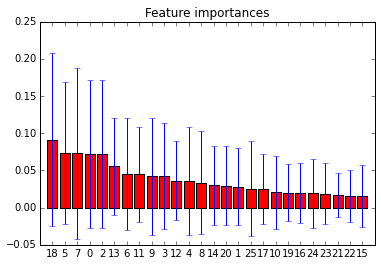

In [135]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [136]:
# build test cases feautre matrix dataframe
test_df = test_df.rename(columns={0:'CaseID'})
test_df.head()
test_df['CaseID'].dtype
test_feature = pd.merge(test_df, df_full, on="CaseID", how='left')
test_feature.head()

,CaseID,f1_DX,f2_DX,f3_DX,f4_DX,f5_DX,f6_DX,f7_DX,f8_DX,f9_DX,...,f4_TS,f5_TS,f6_TS,f7_TS,f8_TS,f9_TS,f10_TS,f11_TS,f12_TS,f13_TS
0,11229,0.000129,747.830797,0.786749,1753.415849,0.077938,335.755439,6265.832599,8.238044,13.838150,...,2310.808478,0.094541,341.599007,8603.876428,8.391743,13.747654,0.000099,5.570626,-0.150675,0.941751
1,11996,0.003496,215.596175,0.881285,908.038743,0.247822,411.400182,3416.558797,7.441903,11.518880,...,3147.025011,0.112963,284.624617,12037.631286,8.568638,13.784936,0.000111,5.453467,-0.185569,0.967272
2,12059,0.000153,763.569634,0.853240,2601.469830,0.099195,253.437615,9642.309684,8.482255,13.985507,...,4470.127578,0.131369,292.232680,16817.195282,8.558706,13.996703,0.000090,5.863353,-0.165541,0.956562
3,12796,0.000196,561.276710,0.763081,1184.539811,0.089579,375.160107,4176.882535,7.886615,13.240285,...,3974.814814,0.128532,295.236285,15329.401068,8.574868,13.691855,0.000115,5.460737,-0.198981,0.973415
4,13553,0.000170,501.849726,0.736065,950.712969,0.075178,309.215090,3301.002151,7.840456,13.263432,...,1833.206178,0.083901,309.561942,6504.596508,8.254674,13.872549,0.000079,5.808166,-0.111328,0.892058


In [137]:
# test case FGA predictions
x2_df = test_feature.drop(['CaseID'], axis=1)
x2_df.head()
x_test = x2_df.as_matrix()
x_test
print regressor.predict(x_test)
y_test = regressor.predict(x_test)

[ 0.14028  0.12168  0.15962  0.15338  0.12014  0.05934  0.13194  0.17984
  0.09656  0.17838  0.04406  0.24606  0.1255   0.21586  0.16934  0.1461
  0.05174  0.06502  0.07894  0.10604  0.1454   0.19704  0.13846  0.1541
  0.15072  0.1234   0.11642  0.10774  0.19332  0.14724  0.15992  0.08808
  0.07418  0.16132  0.1253   0.1334   0.06494  0.26034  0.07252  0.10696
  0.08104  0.17136  0.15126  0.11286  0.05818  0.08112  0.05294  0.09268
  0.11618  0.04904  0.11224  0.15752  0.14008  0.13644  0.07336  0.1462
  0.24914  0.0643   0.28472  0.0553   0.08704  0.1921   0.0915   0.16972
  0.19434  0.07366  0.1469   0.22314  0.18548  0.0417   0.20254  0.07572
  0.16862  0.13706  0.16774  0.13076  0.09246  0.18796  0.19424  0.0896
  0.15784  0.06124  0.08374  0.05196  0.27176  0.20884  0.17938  0.2293
  0.07504  0.18518  0.15902  0.11936  0.07018  0.2614   0.04764  0.09684
  0.09874  0.117    0.0796   0.03854  0.21718  0.15796  0.13214  0.09486
  0.14534  0.13448  0.119    0.08726  0.10846  0.08298  

In [138]:
# save predicted FGA values to csv file
s1 = pd.Series(y_test.tolist())
#print s1
s2 = pd.Series(test_df['CaseID'][0:140])
#print s2
final_df = pd.concat([s2, s1], axis=1)
final_df[0] = final_df[0].astype(str) 
final_df.info()
final_df.head()

final_df.to_csv('predict_3.csv',header=False,index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 2 columns):
0    140 non-null object
1    140 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
